In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [42]:
data = None
try: 
    if first_time:
        load_data()
except NameError:
    load_data()
def load_data():
    data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [43]:
(images, labels) = data


In [44]:
labels = labels.astype(int)

In [45]:
labels

array([5, 0, 4, ..., 4, 5, 6])

In [46]:
first_image = images[0]

In [47]:
first_image = first_image.reshape(28, -1)

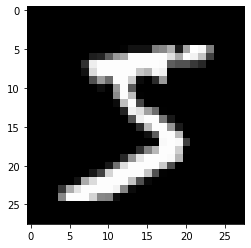

In [48]:
plt.imshow(first_image, cmap='gray')

In [49]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [50]:
transformed_data = tsne.fit_transform(images[:3000, :])

### Describe t-SNE and its transformation

Manifold learning is non linear dimension reduction. Some times dimensionality of datasets can be artifically high. Linear dimension reduction includes PCA and Linear discriment analysis and others. I don't understand how lda can reduce dimensions though. Non linear structure can be found with non linear methods. 

In [52]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, labels[:3000])), 
                       columns = ["tsne-component1", "tsne-component2", "targets"])

In [53]:
tsne_df["targets"] = tsne_df["targets"].astype(int)

In [54]:
tsne_df.head()

,tsne-component1,tsne-component2,targets
0,-9.742266,-28.548525,5
1,-25.476608,-66.111008,0
2,-39.992714,32.707321,4
3,46.730042,29.864080,1
4,-14.279590,30.505270,9


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


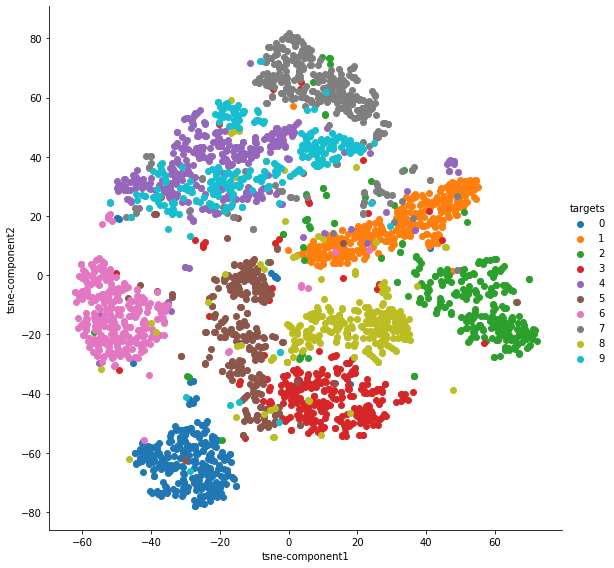

In [55]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "tsne-component1", "tsne-component2").add_legend()

In [56]:
## TODO Try other linear and non-linear dimensionality reductions.
## Plot 3D view of 3-component t-SNE to get fimilar with 3d visualizations in Matplotlib